In [17]:
# Importing appropriate packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [18]:
# Reading the patients.csv file
patient_df = pd.read_csv("patients.csv")
index = patient_df['patient']
affected_sides = patient_df['affected']
mal_scores = patient_df['MAL amount']

In [19]:
# Initialize M2 and index
M2_affected = [0 for i in range(len(index))]
M2_index = 0

In [14]:
# Loop through each participant
for i in index:
    # Printing participant ID
    message_a = "Reading participant #" + str(i)
    print(message_a)

    # Getting affected side
    side = affected_sides[patient_df[patient_df['patient'] == i].index[0]]
    message_b = "- Reading the affected arm"
    print(message_b)

    # Build the file path
    filepath = f"./{i}/{i}/LOG_{side.capitalize()}.csv"

    try:
        # Read accelerometer data
        acc_df = pd.read_csv(filepath, skiprows=6)

        # Extract x, y, z columns
        affected_acc_x = acc_df.iloc[:, 0]
        affected_acc_y = acc_df.iloc[:, 1]
        affected_acc_z = acc_df.iloc[:, 2]

        # Compute magnitude and M2
        affected_acc_mag = np.sqrt(affected_acc_x**2 + affected_acc_y**2 + affected_acc_z**2)
        tmp_affected_M2 = np.mean(affected_acc_mag ** 2)

        # Store M2
        M2_affected[M2_index] = tmp_affected_M2

    except Exception as e:
        print(f"⚠️ Skipped participant {i} due to error: {e}")
        M2_affected[M2_index] = 0

    M2_index = M2_index + 1


Reading participant #13
- Reading the affected arm
Reading participant #14
- Reading the affected arm
Reading participant #15
- Reading the affected arm
Reading participant #16
- Reading the affected arm
Reading participant #17
- Reading the affected arm
Reading participant #18
- Reading the affected arm
Reading participant #21
- Reading the affected arm
Reading participant #22
- Reading the affected arm
Reading participant #23
- Reading the affected arm
Reading participant #24
- Reading the affected arm
Reading participant #25
- Reading the affected arm
Reading participant #26
- Reading the affected arm
Reading participant #33
- Reading the affected arm


In [15]:
# Print the final M2 values list
print(M2_affected)


[np.float64(181.95207290111605), np.float64(119.96811514942723), np.float64(6758.319695857609), np.float64(184.5842723994342), np.float64(578.6385242799275), np.float64(179.83088993077445), np.float64(162.36857580780236), np.float64(296.51815149726445), np.float64(3394.4305884398195), np.float64(127.26631122452035), np.float64(223.37882047782693), np.float64(4741.870243272921), np.float64(161.7571730901147)]


In [16]:
#Summary of Patient IDs, Affected Sides, MAL Scores, and Calculated M2 Values

# Combine M2 values with patient info for clarity
m2_values = [
    181.95207290111605, 119.96811514942723, 6758.319695857609,
    184.5842723994342, 578.6385242799275, 179.83088993077445,
    162.36857580780236, 296.51815149726445, 3394.4305884398195,
    127.26631122452035, 223.37882047782693, 4741.870243272921,
    161.7571730901147
]

# Reload patient data
patient_df = pd.read_csv("patients.csv").reset_index(drop=True)

# Add M2 column
patient_df['M2 Value'] = m2_values

# Show table
patient_df


patient affected  MAL amount     M2 Value
0        13    right        5.03   181.952073
1        14     left        0.83   119.968115
2        15    right        5.00  6758.319696
3        16     left        2.40   184.584272
4        17     left        4.30   578.638524
5        18    right        4.77   179.830890
6        21     left        5.00   162.368576
7        22    right        5.00   296.518151
8        23     left        4.13  3394.430588
9        24     left        1.93   127.266311
10       25     left        5.00   223.378820
11       26     left        4.23  4741.870243
12       33     left        3.37   161.757173

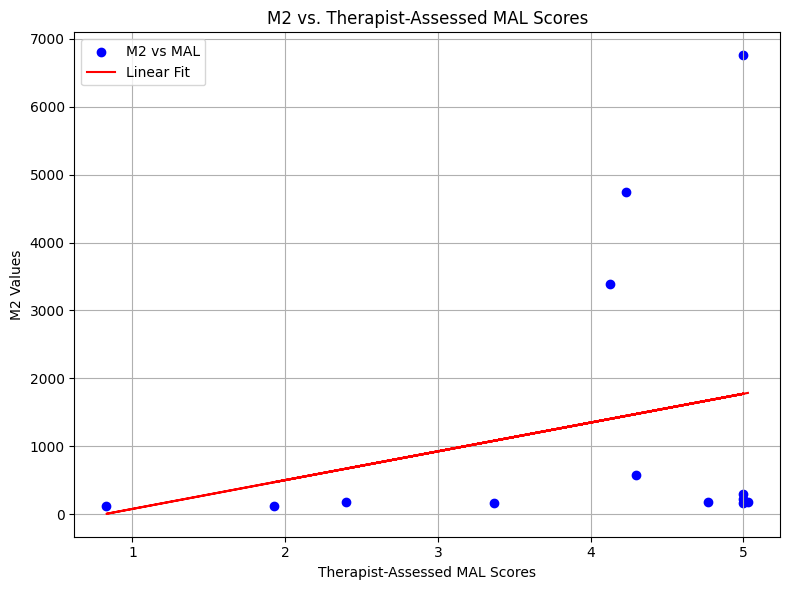

In [9]:
# Scatter plot + regression line
plt.figure(figsize=(8, 6))
plt.scatter(mal_scores, M2_affected, color='blue', label='M2 vs MAL')

# Add labels and title
plt.xlabel('Therapist-Assessed MAL Scores')
plt.ylabel('M2 Values')
plt.title('M2 vs. Therapist-Assessed MAL Scores')

# Linear fit
coeffs = np.polyfit(mal_scores, M2_affected, 1)
fitted_line = np.poly1d(coeffs)(mal_scores)

# Add regression line
plt.plot(mal_scores, fitted_line, color='red', label='Linear Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig("M2_vs_MAL_plot.png")
plt.show()